**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [47]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 7.6 MB/s eta 0:00:00


In [26]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa

In [27]:
# mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [28]:
# import decimate
from scipy.signal import decimate

In [29]:
# load an wav file
path = "drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Time Series/DATASET/RavdessAudioOnly/03-01-01-01-01-01-01.wav"
ts, sr = librosa.load(path, sr=None)

# print the shape of the wav file
print(ts.shape, sr)

(158558,) 48000


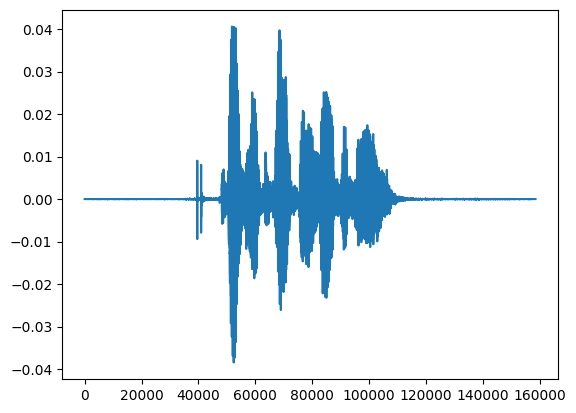

In [30]:
# plot the audio wave
plt.plot(ts)
plt.show()

In [31]:
# listen the audio
Audio(ts, rate=sr)

In [32]:
# isolate the word "kids"
Audio(ts[50000:58000], rate=sr)

In [33]:
# downsample the audio
q = 8
ts1 = decimate(ts[50000:58000], q=8)

In [34]:
# liste the downsampled audio
Audio(ts1, rate=sr/q)

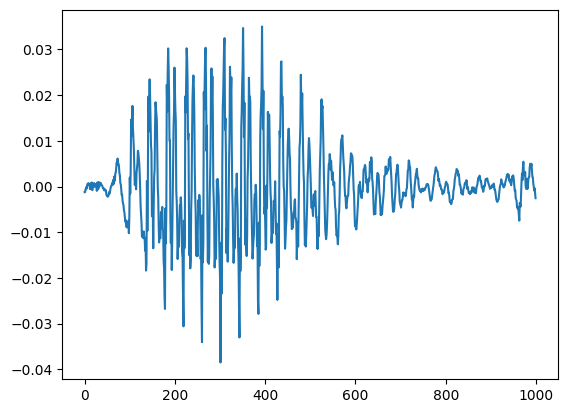

In [35]:
# plot the downsampled audio wave
plt.plot(ts1)
plt.show()

In [36]:
# import another wav file
path = 'drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Time Series/DATASET/RavdessAudioOnly/03-01-01-01-01-02-01.wav'
ts2, sr = librosa.load(path, sr=None)

# print the shape of the audio file
print(ts.shape, sr)

(158558,) 48000


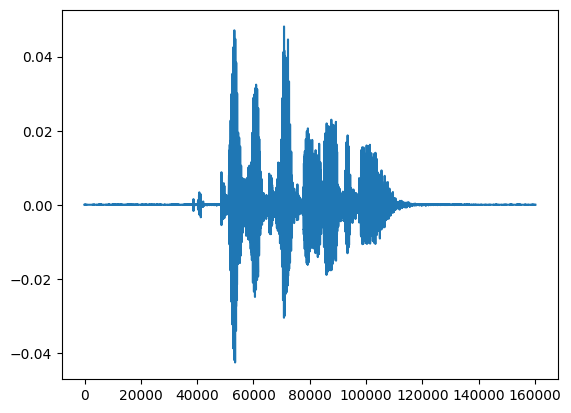

In [37]:
# plot the audio wave
plt.plot(ts2)
plt.show()

In [38]:
# listen the second audio
Audio(ts2, rate=sr)

In [39]:
# isolate the word "kids"
Audio(ts2[50000:58000], rate=sr)

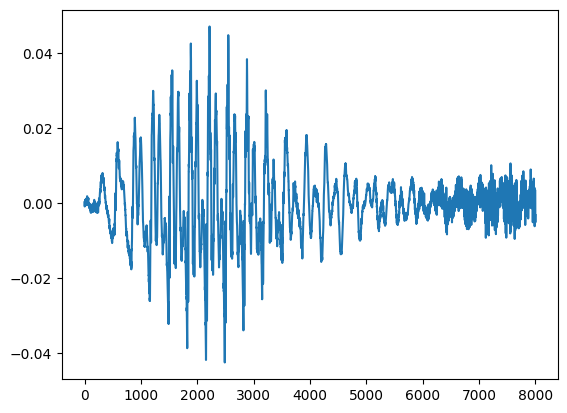

In [40]:
# plot the word "kids" of the second audio
plt.plot(ts2[51000:59000])

In [41]:
# downsample the audio
q = 8
ts2 = decimate(ts2[51000:59000], q=8)

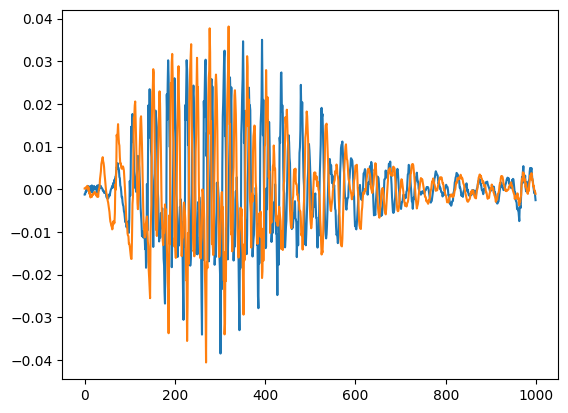

In [42]:
# plot the two audio waves downsampled
plt.plot(ts1)
plt.plot(ts2)
plt.show()

### What if time series are not so well aligned?

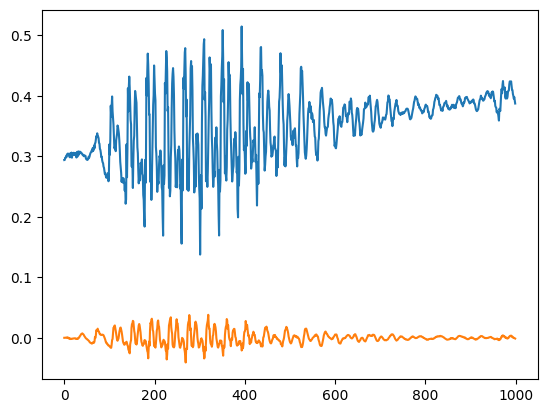

In [43]:
# an example of two timeeries not well aligned
ts1 = pd.Series(ts1*5 + 0.3 + np.arange(len(ts1))*0.0001)
ts2 = pd.Series(ts2)
plt.plot(ts1)
plt.plot(ts2)
plt.show()

# Transformations

### Transformation I: Offset Translation

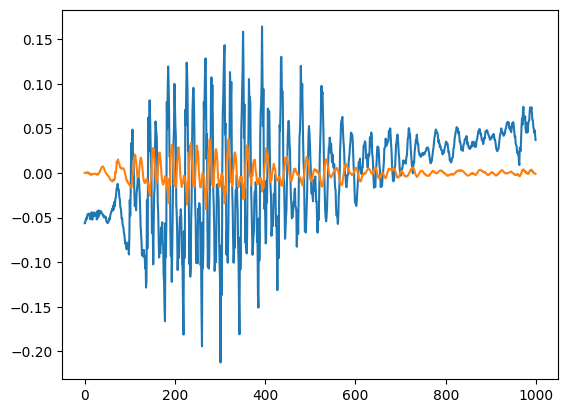

In [44]:
plt.plot(ts1 - ts1.mean())
plt.plot(ts2 - ts2.mean())
plt.show()

### Transformation II: Amplitude Scaling

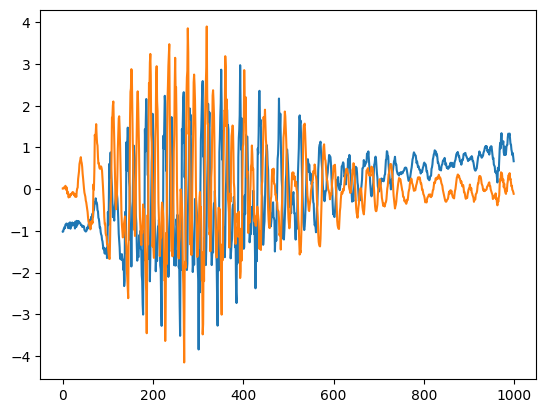

In [45]:
plt.plot((ts1 - ts1.mean())/ts1.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

In [48]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

https://tslearn.readthedocs.io/en/latest/index.html

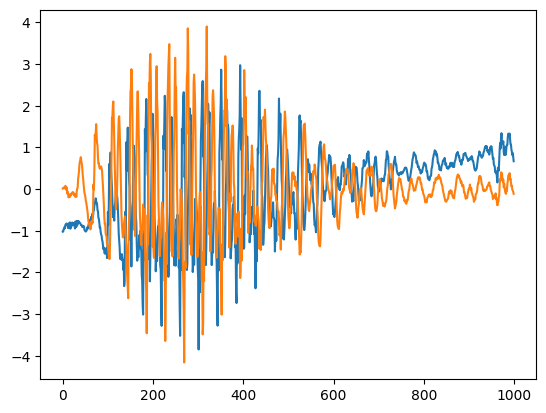

In [49]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(ts1.values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(ts2.values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation III: Trend removal

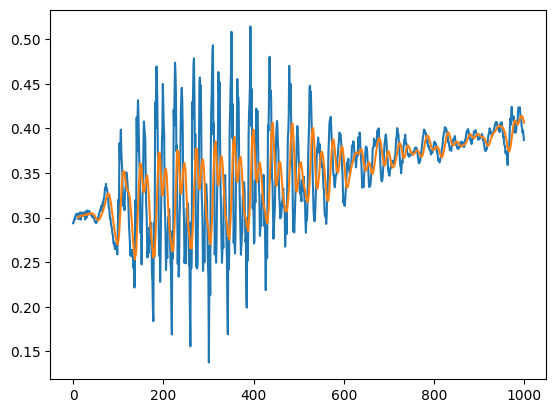

In [50]:
plt.plot(ts1)
plt.plot(ts1.rolling(window=12).mean())
plt.show()

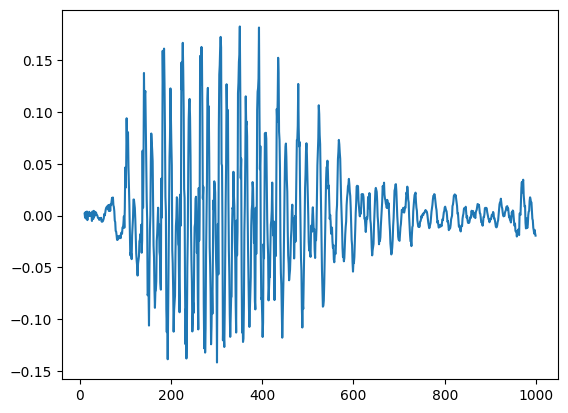

In [51]:
ts_shift = ts1 - ts1.rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

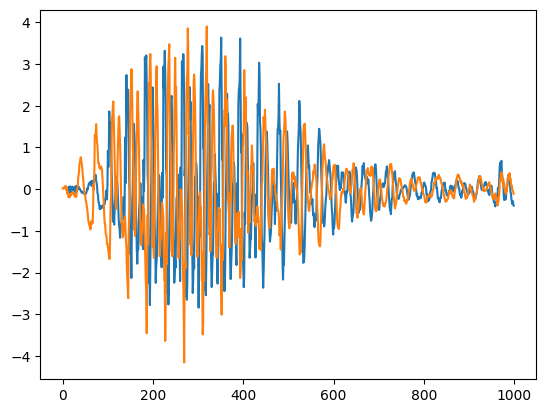

In [52]:
ts1_det = ts1 - ts1.rolling(window=12).mean()
plt.plot((ts1_det - ts1_det.mean())/ts1_det.std())
plt.plot((ts2 - ts2.mean())/ts2.std())
plt.show()

### Transformation IV: Noise (smoothing)

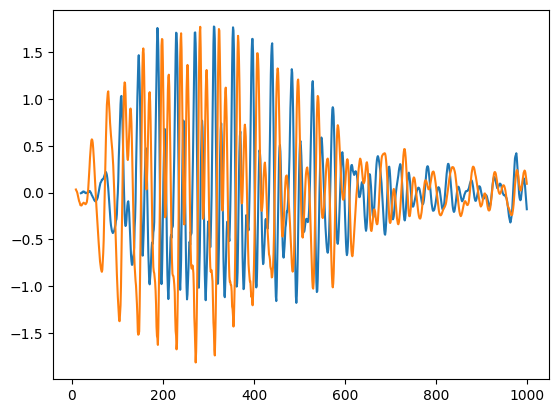

In [53]:
w = 10
ts1_det = ts1 - ts1.rolling(window=12).mean()
plt.plot(((ts1_det - ts1_det.mean())/ts1_det.std()).rolling(window=w).mean())
plt.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean())
plt.show()

In [54]:
ts1 = ((ts1_det - ts1_det.mean())/ts1_det.std()).rolling(window=w).mean().dropna()
ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=w).mean().dropna()[:-11]
ts1.shape, ts2.shape

((980,), (980,))